Importing Necessary Library

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import numpy as np
from math import ceil 
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# ARIMA model 
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels as sm
# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.dates import date2num
import seaborn as sns
from datetime import datetime
import subprocess
import matplotlib.pyplot as plt

Function Definition

In [ ]:
#function to get the html
def get_html(url):
  page = requests.get(url)
  soup = BeautifulSoup(page.text, 'lxml')
  return soup

In [ ]:
#function to get the table headings
def get_headers(soup,class_name,headers):
  
  table = soup.find('table',{'class':class_name})
  for i in table.find_all('th'):
    title = i.text.strip()
    headers.append(title)
  return table
#function to get data
def get_data(table,df):
  for row in table.find_all('tbody'):
    for row in table.find_all('tr')[1:-2]:
      data = row.find_all('td')
      row_data = [td.text.strip() for td in data]
      length = len(df)
      df.loc[length] = row_data
  return df

Getting Gold Price Dataset

In [ ]:
g1 = get_html('https://in.finance.yahoo.com/quote/GC%3DF/history?period1=1592438400&period2=1623974400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true')

In [ ]:
headers1 = []
t1 = get_headers(g1,'W(100%) M(0)',headers1)

In [ ]:
df1 = pd.DataFrame(columns = headers1)

In [ ]:
df1

,Date,Open,High,Low,Close*,Adj. close**,Volume


In [ ]:
result = get_data(t1,df1)

In [ ]:
df1

,Date,Open,High,Low,Close*,Adj. close**,Volume
0,17-Jun-2021,"1,811.80","1,823.30","1,769.60","1,773.80","1,773.80","1,135"
1,16-Jun-2021,"1,859.40","1,860.10","1,809.20","1,859.50","1,859.50",117
2,15-Jun-2021,"1,866.40","1,867.20","1,854.40","1,854.50","1,854.50",78
3,14-Jun-2021,"1,866.20","1,866.60","1,846.50","1,864.00","1,864.00",41
4,11-Jun-2021,"1,900.90","1,902.30","1,875.20","1,877.40","1,877.40",349
...,...,...,...,...,...,...,...
94,02-Feb-2021,"1,859.60","1,861.30","1,827.60","1,830.50","1,830.50","1,293"
95,01-Feb-2021,"1,866.60","1,871.90","1,850.00","1,860.80","1,860.80","1,494"
96,29-Jan-2021,"1,842.00","1,876.00","1,838.70","1,847.30","1,847.30","1,634"
97,28-Jan-2021,"1,843.40","1,862.90","1,831.50","1,837.90","1,837.90","27,283"


In [ ]:
g2 = get_html("https://in.finance.yahoo.com/quote/GC%3DF/history?period1=1566777600&period2=1611619200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true")


headers3 = []
t3 = get_headers(g2,'W(100%) M(0)',headers3)

df3 = pd.DataFrame(columns = headers3)
res = get_data(t3,df3)

In [ ]:
df3

,Date,Open,High,Low,Close*,Adj. close**,Volume
0,25-Jan-2021,"1,864.70","1,864.70","1,851.80","1,854.90","1,854.90",26
1,22-Jan-2021,"1,854.90","1,855.70","1,852.70","1,855.70","1,855.70",8
2,21-Jan-2021,"1,865.30","1,868.00","1,865.30","1,865.30","1,865.30",6
3,20-Jan-2021,"1,847.80","1,866.60","1,844.40","1,865.90","1,865.90",16
4,19-Jan-2021,"1,802.00","1,842.90","1,802.00","1,839.50","1,839.50",13
...,...,...,...,...,...,...,...
94,09-Sep-2020,"1,926.90","1,946.20","1,924.60","1,944.70","1,944.70",219
95,08-Sep-2020,"1,930.90","1,937.90","1,903.10","1,933.00","1,933.00",271
96,04-Sep-2020,"1,927.90","1,939.70","1,917.70","1,923.90","1,923.90",607
97,03-Sep-2020,"1,937.10","1,938.80","1,923.00","1,927.60","1,927.60",179


In [ ]:
g3 = get_html("https://in.finance.yahoo.com/quote/GC%3DF/history?period1=1585958400&period2=1599004800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true")
headers4 = []
t4 = get_headers(g3,'W(100%) M(0)',headers4)
df4 = pd.DataFrame(columns = headers4)
res = get_data(t4,df4)

In [ ]:
df4

,Date,Open,High,Low,Close*,Adj. close**,Volume
0,01-Sep-2020,"1,961.70","1,986.30","1,961.70","1,968.20","1,968.20",186
1,31-Aug-2020,"1,970.00","1,971.30","1,953.30","1,967.60","1,967.60",158
2,28-Aug-2020,"1,927.10","1,971.30","1,922.50","1,964.60","1,964.60",778
3,27-Aug-2020,"1,948.90","1,972.50","1,921.60","1,921.60","1,921.60","2,303"
4,26-Aug-2020,"1,909.70","1,950.80","1,909.70","1,940.70","1,940.70",287
...,...,...,...,...,...,...,...
94,20-Apr-2020,"1,686.00","1,701.60","1,680.00","1,701.60","1,701.60",106
95,17-Apr-2020,"1,715.70","1,725.00","1,684.90","1,689.20","1,689.20",223
96,16-Apr-2020,"1,731.00","1,750.60","1,715.00","1,720.40","1,720.40",162
97,15-Apr-2020,"1,739.40","1,744.90","1,722.70","1,727.20","1,727.20",642


In [ ]:
g4 = get_html("https://in.finance.yahoo.com/quote/GC%3DF/history?period1=1574812800&period2=1586822400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true")


headers5 = []
t5 = get_headers(g4,'W(100%) M(0)',headers5)

df5 = pd.DataFrame(columns = headers5)
res = get_data(t5,df5)

In [ ]:
df5

,Date,Open,High,Low,Close*,Adj. close**,Volume
0,13-Apr-2020,"1,722.00","1,756.80","1,710.70","1,744.80","1,744.80",696
1,09-Apr-2020,"1,662.70","1,736.20","1,662.70","1,736.20","1,736.20",825
2,08-Apr-2020,"1,669.70","1,677.00","1,662.50","1,665.40","1,665.40",747
3,07-Apr-2020,"1,695.70","1,724.40","1,658.00","1,664.80","1,664.80","1,144"
4,06-Apr-2020,"1,629.10","1,696.70","1,625.90","1,677.00","1,677.00","1,063"
...,...,...,...,...,...,...,...
87,05-Dec-2019,"1,474.70","1,478.00","1,472.30","1,476.90","1,476.90",907
88,04-Dec-2019,"1,477.50","1,483.40","1,471.20","1,474.00","1,474.00",613
89,03-Dec-2019,"1,461.60","1,480.40","1,459.50","1,478.20","1,478.20","1,460"
90,02-Dec-2019,"1,462.80","1,464.40","1,453.30","1,462.30","1,462.30","2,172"


In [ ]:
g5 = get_html("https://in.finance.yahoo.com/quote/GC%3DF/history?period1=1560816000&period2=1574985600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true")


headers6 = []
t6 = get_headers(g5,'W(100%) M(0)',headers6)

df6 = pd.DataFrame(columns = headers6)
res = get_data(t6,df6)

In [ ]:
df6

,Date,Open,High,Low,Close*,Adj. close**,Volume
0,27-Nov-2019,"1,461.10","1,461.90","1,452.00","1,453.40","1,453.40","88,364"
1,26-Nov-2019,"1,459.80","1,459.80","1,459.80","1,459.80","1,459.80","3,46,362"
2,25-Nov-2019,"1,457.10","1,457.10","1,455.50","1,456.60","1,456.60",14
3,22-Nov-2019,"1,468.60","1,468.60","1,463.10","1,463.10","1,463.10",19
4,21-Nov-2019,"1,463.10","1,463.10","1,463.10","1,463.10","1,463.10",16
...,...,...,...,...,...,...,...
94,17-Jul-2019,"1,404.60","1,421.30","1,404.60","1,421.30","1,421.30",6
95,16-Jul-2019,"1,413.60","1,413.70","1,405.00","1,409.20","1,409.20",13
96,15-Jul-2019,"1,414.40","1,415.00","1,411.40","1,411.40","1,411.40",25
97,12-Jul-2019,"1,405.60","1,410.10","1,405.60","1,409.90","1,409.90",8


In [ ]:
Df = pd.concat([df1,df3,df4,df5,df6], ignore_index=True)

In [ ]:
Df

,Date,Open,High,Low,Close*,Adj. close**,Volume
0,17-Jun-2021,"1,811.80","1,823.30","1,769.60","1,773.80","1,773.80","1,135"
1,16-Jun-2021,"1,859.40","1,860.10","1,809.20","1,859.50","1,859.50",117
2,15-Jun-2021,"1,866.40","1,867.20","1,854.40","1,854.50","1,854.50",78
3,14-Jun-2021,"1,866.20","1,866.60","1,846.50","1,864.00","1,864.00",41
4,11-Jun-2021,"1,900.90","1,902.30","1,875.20","1,877.40","1,877.40",349
...,...,...,...,...,...,...,...
483,17-Jul-2019,"1,404.60","1,421.30","1,404.60","1,421.30","1,421.30",6
484,16-Jul-2019,"1,413.60","1,413.70","1,405.00","1,409.20","1,409.20",13
485,15-Jul-2019,"1,414.40","1,415.00","1,411.40","1,411.40","1,411.40",25
486,12-Jul-2019,"1,405.60","1,410.10","1,405.60","1,409.90","1,409.90",8


EDA

In [ ]:
Df= Df.rename(columns = {'Adj. close**': 'Close'}, inplace = False)


In [ ]:
Df.replace(to_replace = '-',value =np.NaN,inplace = True)

In [ ]:
Df = Df.dropna()

In [ ]:
Df

,Date,Open,High,Low,Close*,Close,Volume
0,17-Jun-2021,"1,811.80","1,823.30","1,769.60","1,773.80","1,773.80","1,135"
1,16-Jun-2021,"1,859.40","1,860.10","1,809.20","1,859.50","1,859.50",117
2,15-Jun-2021,"1,866.40","1,867.20","1,854.40","1,854.50","1,854.50",78
3,14-Jun-2021,"1,866.20","1,866.60","1,846.50","1,864.00","1,864.00",41
4,11-Jun-2021,"1,900.90","1,902.30","1,875.20","1,877.40","1,877.40",349
...,...,...,...,...,...,...,...
483,17-Jul-2019,"1,404.60","1,421.30","1,404.60","1,421.30","1,421.30",6
484,16-Jul-2019,"1,413.60","1,413.70","1,405.00","1,409.20","1,409.20",13
485,15-Jul-2019,"1,414.40","1,415.00","1,411.40","1,411.40","1,411.40",25
486,12-Jul-2019,"1,405.60","1,410.10","1,405.60","1,409.90","1,409.90",8


In [ ]:
Df.index = np.arange(1, len(Df) + 1)

In [ ]:
Df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close*    0
Close     0
Volume    0
dtype: int64

In [ ]:
Df.dtypes

Date      object
Open      object
High      object
Low       object
Close*    object
Close     object
Volume    object
dtype: object

In [ ]:
Df.astype(str)


,Date,Open,High,Low,Close*,Close,Volume
1,17-Jun-2021,"1,811.80","1,823.30","1,769.60","1,773.80","1,773.80","1,135"
2,16-Jun-2021,"1,859.40","1,860.10","1,809.20","1,859.50","1,859.50",117
3,15-Jun-2021,"1,866.40","1,867.20","1,854.40","1,854.50","1,854.50",78
4,14-Jun-2021,"1,866.20","1,866.60","1,846.50","1,864.00","1,864.00",41
5,11-Jun-2021,"1,900.90","1,902.30","1,875.20","1,877.40","1,877.40",349
...,...,...,...,...,...,...,...
480,17-Jul-2019,"1,404.60","1,421.30","1,404.60","1,421.30","1,421.30",6
481,16-Jul-2019,"1,413.60","1,413.70","1,405.00","1,409.20","1,409.20",13
482,15-Jul-2019,"1,414.40","1,415.00","1,411.40","1,411.40","1,411.40",25
483,12-Jul-2019,"1,405.60","1,410.10","1,405.60","1,409.90","1,409.90",8


In [ ]:
Df['Date'] =pd.to_datetime(Df.Date)


In [ ]:
Df.replace(',','', regex=True, inplace=True)

In [ ]:
cols = ['Open',	'High',	'Low',	'Close*',	'Close',	'Volume']
Df[cols] = Df[cols].astype(float)

In [ ]:
Df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close*           float64
Close            float64
Volume           float64
dtype: object

Text(0.5, 1.0, 'Gold')

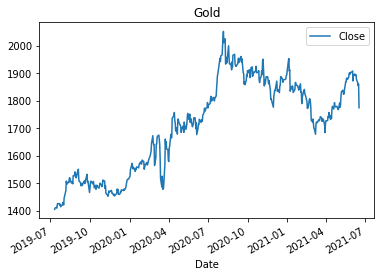

In [ ]:
Df.sort_values('Date')

Df.plot(x='Date',y='Close')
plt.title('Gold')

In [ ]:
Df.describe()

,Open,High,Low,Close*,Close,Volume
count,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000
mean,1708.909504,1718.826653,1698.541116,1708.866942,1708.866942,5357.849174
std,168.507706,169.838950,167.018355,168.554908,168.554908,30267.664013
min,1404.600000,1410.100000,1400.900000,1404.300000,1404.300000,1.000000
25%,1537.500000,1547.150000,1519.200000,1530.725000,1530.725000,81.500000
50%,1730.750000,1741.500000,1721.850000,1730.100000,1730.100000,258.500000
75%,1863.425000,1867.275000,1852.025000,1860.725000,1860.725000,713.500000
max,2045.500000,2063.000000,2040.000000,2051.500000,2051.500000,346362.000000


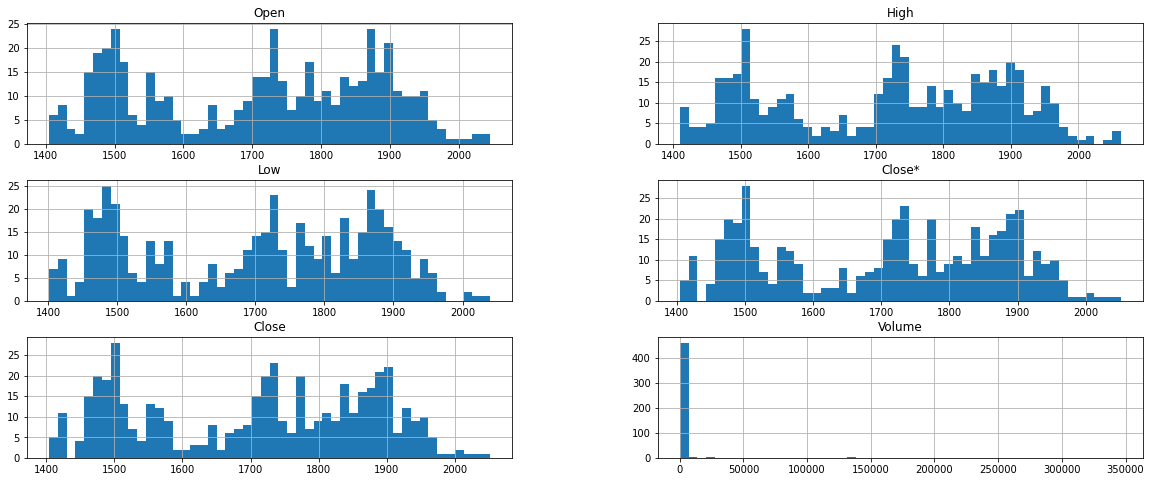

In [ ]:
# Darw histogram of each column
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (20,8)
hist = Df[["Open","High","Low","Close*","Close" ,"Volume"]].hist(bins=50)

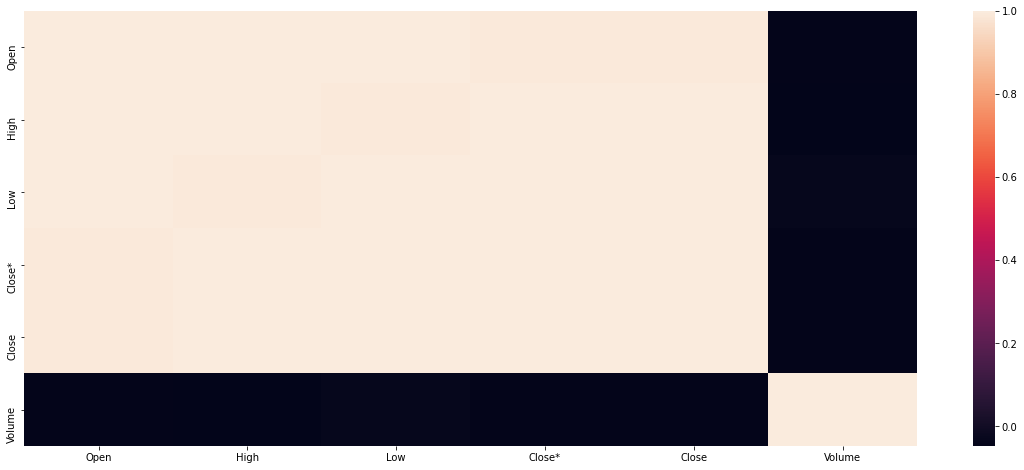

In [ ]:
import seaborn as sns
# calculate the correlation matrix
corr = Df[["Open","High","Low","Close*","Close" ,"Volume"]] .corr()
# plot the heatmap to show the correlations among different price columns 
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
#Correlation Score
print(corr['Close'].sort_values(ascending=False), '\n')

Close     1.000000
Close*    1.000000
Low       0.997757
High      0.996720
Open      0.993904
Volume   -0.039588
Name: Close, dtype: float64 



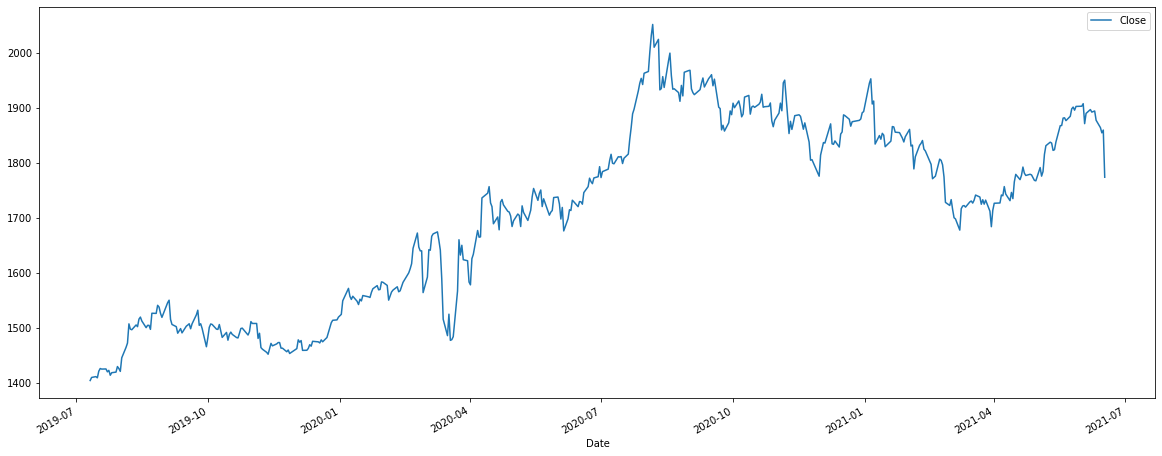

In [ ]:
#Stationarity Test
plt.rcParams["figure.figsize"] = (20,8)
Df.plot(x='Date',y='Close')

In [ ]:
# only take Price column 
DF=Df[['Date','Close']]
# set date as index to make df series type 
DF_1= DF.set_index('Date')['Close']
type(DF_1)

pandas.core.series.Series

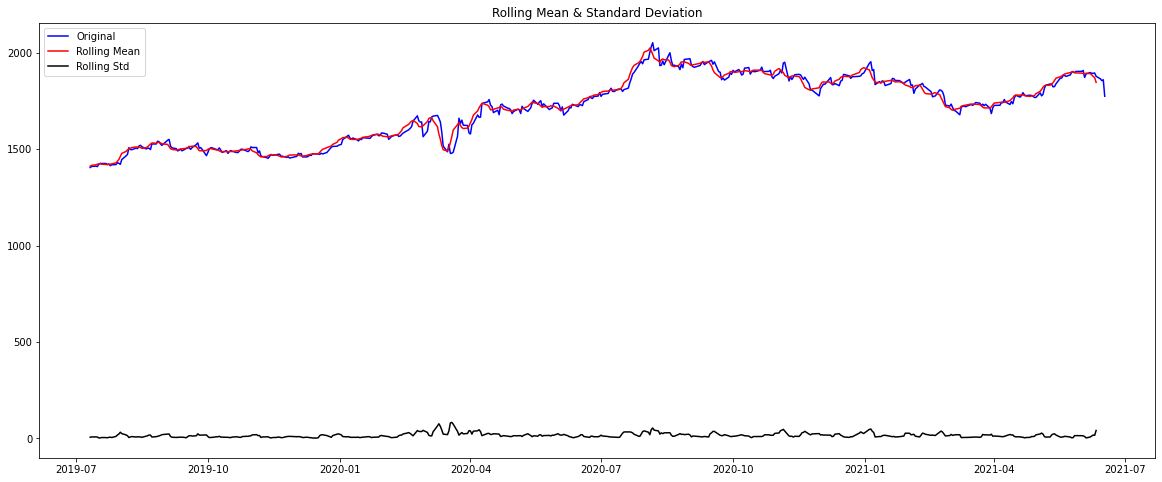

<Figure size 5760x720 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                  -0.381842
p-value                          0.913087
#Lags Used                       6.000000
Number of Observations Used    477.000000
Critical Value (1%)             -3.444134
Critical Value (5%)             -2.867618
Critical Value (10%)            -2.570008
dtype: float64


In [ ]:
# Visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [20,8]
# Using ADF(Augmented Dickey Fuller) test to identify whether the series is stationary or not 
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):   
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=5).mean() 
    rolstd = timeseries.rolling(window=5).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.figure(figsize=(80,10))
    plt.show(block=False)
    major_ticks = np.arange(0, 101, 20)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(DF_1)

# Data Stationarity Transformation

In [ ]:
Gold_data = DF_1

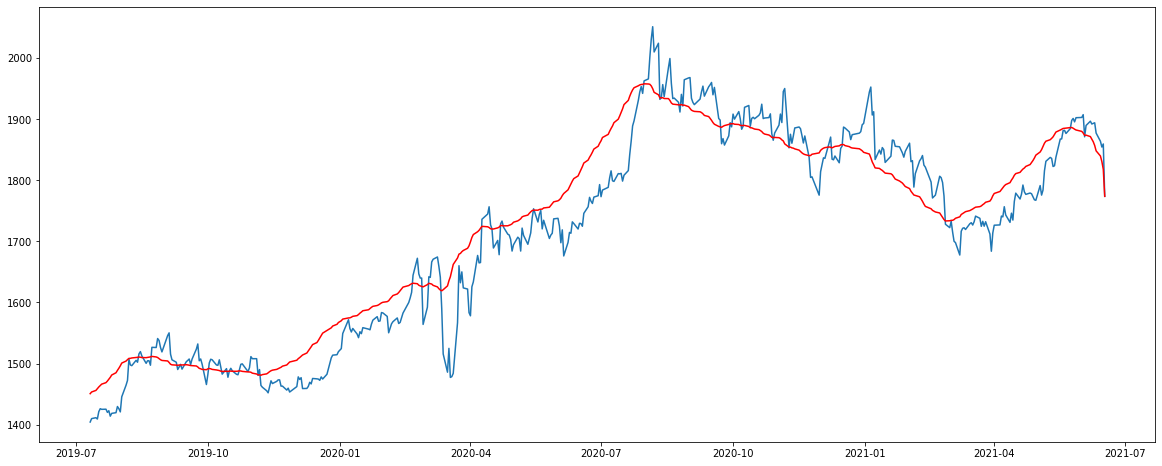

In [ ]:
expwighted_avg = Gold_data.ewm(halflife=12).mean()
plt.plot(Gold_data)
plt.plot(expwighted_avg, color='red')

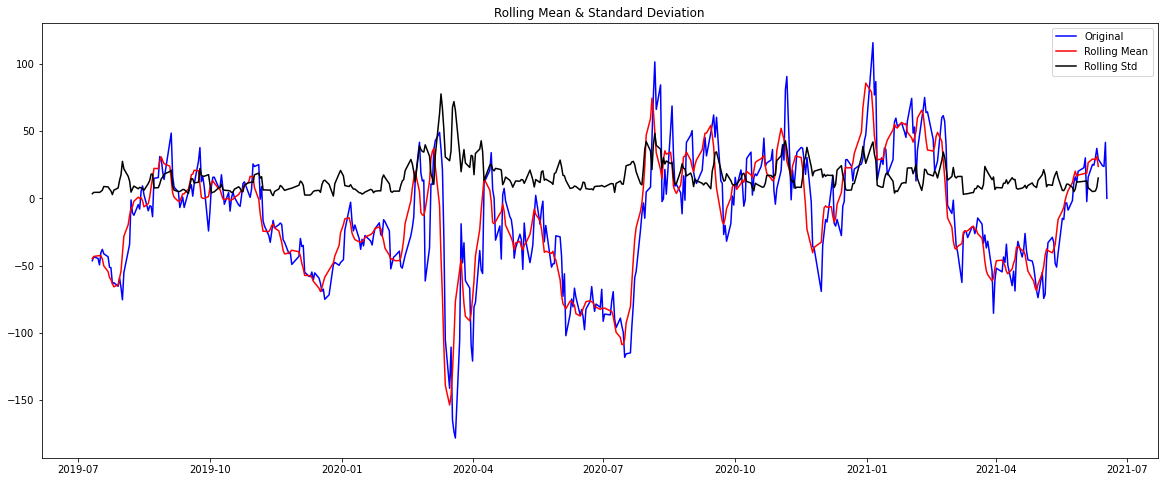

<Figure size 5760x720 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                  -3.247164
p-value                          0.017412
#Lags Used                       7.000000
Number of Observations Used    476.000000
Critical Value (1%)             -3.444163
Critical Value (5%)             -2.867631
Critical Value (10%)            -2.570014
dtype: float64


In [ ]:
ewma_diff = Gold_data - expwighted_avg
test_stationarity(ewma_diff)

# Decomposing

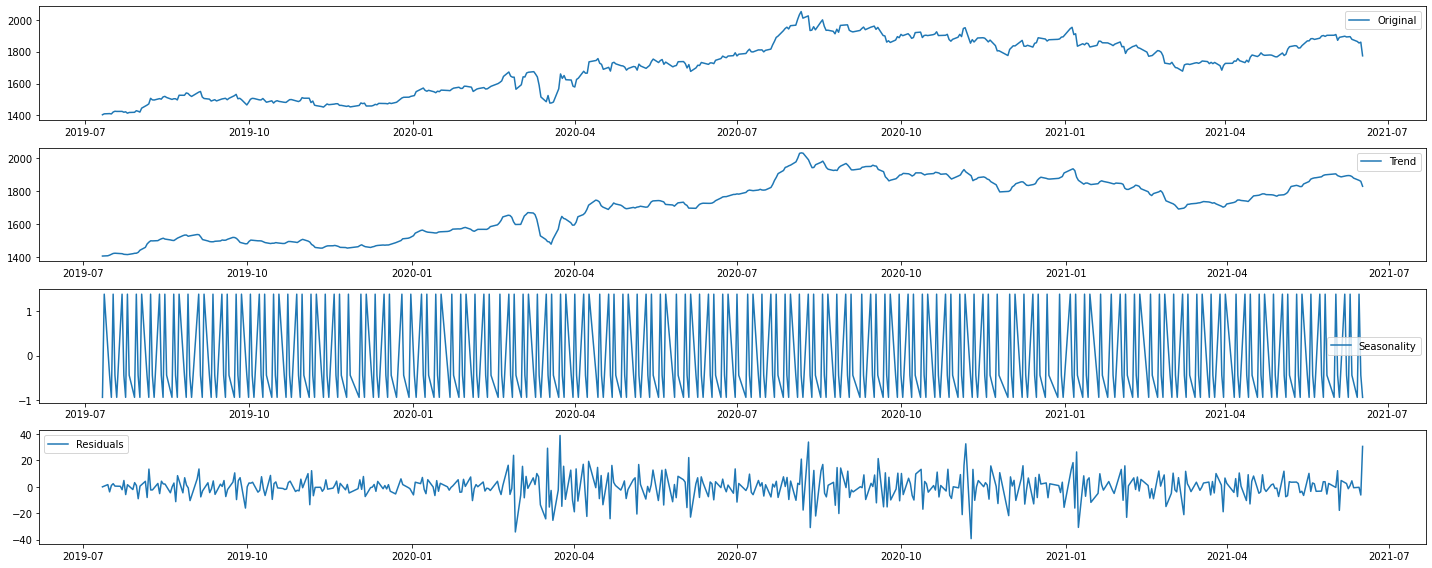

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Gold_data, freq=3)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Gold_data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

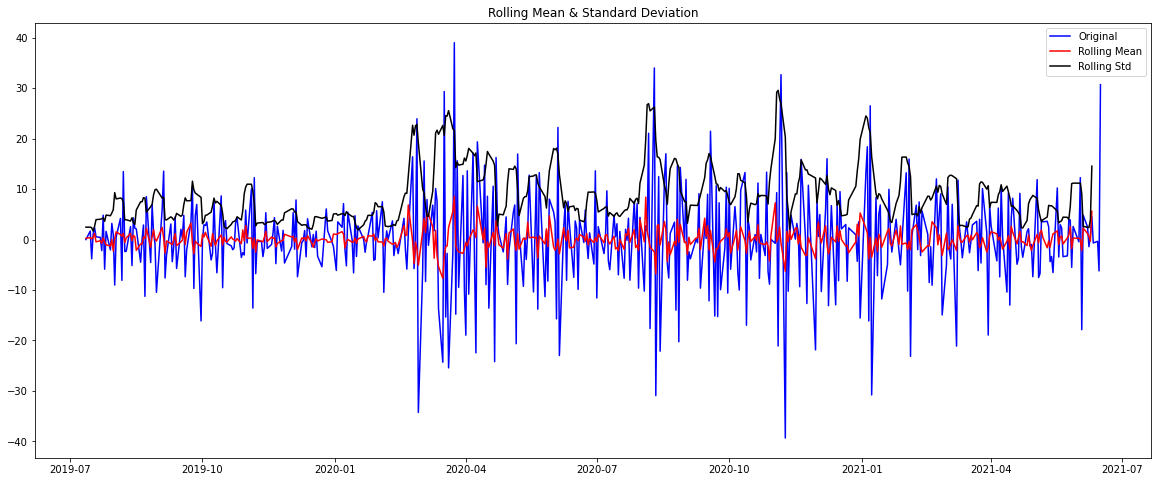

<Figure size 5760x720 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                -1.161657e+01
p-value                        2.440823e-21
#Lags Used                     1.200000e+01
Number of Observations Used    4.690000e+02
Critical Value (1%)           -3.444370e+00
Critical Value (5%)           -2.867722e+00
Critical Value (10%)          -2.570063e+00
dtype: float64


In [ ]:
Gold_data_decompose = residual
Gold_data_decompose.dropna(inplace=True)
test_stationarity(Gold_data_decompose)

# Linear Regression Model

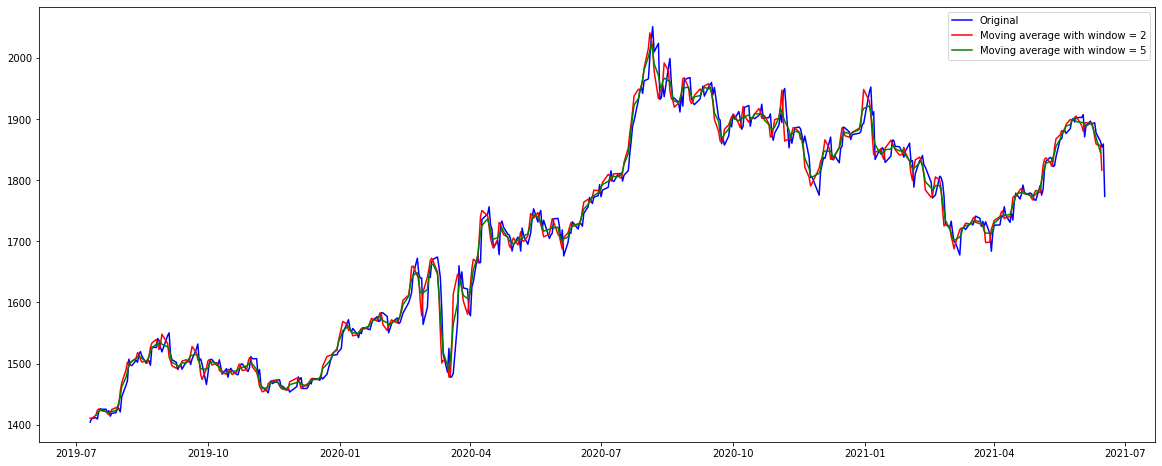

(484, 9)

In [ ]:
#df.set_index('Date',inplace=True, drop=True)
# create two new columns with lagged terms with different moving window size 
Df['S_1'] = Df["Close"].shift(1).rolling(window=2, center = True).mean()
Df['S_2'] = Df["Close"].shift(1).rolling(window=5, center = True).mean()

# Define exploratory variables
# Finding moving average of past 2 day and 5 days 
DF = Df.dropna()
X = Df[['S_1','S_2']]
X.head()
plt.plot(Df['Date'], Df['Close'], color="blue", label = "Original")
plt.plot(Df['Date'], Df['S_1'], color="red", label= "Moving average with window = 2")
plt.plot(Df['Date'], Df["S_2"],color="green", label= "Moving average with window = 5")
plt.legend(loc='best')
plt.show()

# dependent variable
y = Df["Close"]
y.head()
Df.shape

In [ ]:
# Split into train and test

# training size 
t = 0.9

count = int(ceil(X.shape[0]*t))
X = X.iloc[::-1]
y = y.iloc[::-1]

X_train = X[:count]
X_test = X[count:]

y_train = y[:count]
y_test = y[count:]

In [ ]:
X_train

,S_1,S_2
484,1410.65,NaN
483,1410.30,NaN
482,1415.25,1415.58
481,1423.70,1418.62
480,1425.60,1421.40
...,...,...
53,1740.80,1738.38
52,1748.45,1741.74
51,1750.05,1742.58
50,1737.25,1743.52


In [ ]:
mean_x_train = Df['S_2'].mean()

In [ ]:
X_test

,S_1,S_2
48,1740.55,1744.20
47,1750.15,1751.34
46,1772.20,1758.98
45,1774.20,1765.20
44,1773.35,1776.68
43,1784.80,1779.84
42,1786.75,1779.44
41,1779.10,1781.40
40,1778.10,1781.54
39,1778.60,1777.72


In [ ]:
mean_x_test = Df['S_2'].mean()

In [ ]:
X_train.replace(to_replace = np.NaN,value =mean_x_train,inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
X_test.replace(to_replace = np.NaN,value =mean_x_test,inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


# Predicting Price for Next 4 Days

In [ ]:
# Performing linear regression
linear = LinearRegression().fit(X_train, y_train)
print("Gold Price =", round(linear.coef_[0], 2), ",* 2 Days Moving Average", 
     round(linear.coef_[1], 2), ",* 12 Days Moving Average ",
      round(linear.intercept_, 2))
# Predict prices
predicted_price = linear.predict(X_test)



Gold Price = 0.65 ,* 2 Days Moving Average 0.36 ,* 12 Days Moving Average  -8.43


In [ ]:
predicted_price[-4:]

array([1852.18627542, 1777.71219582, 1708.82735729, 1708.82735729])

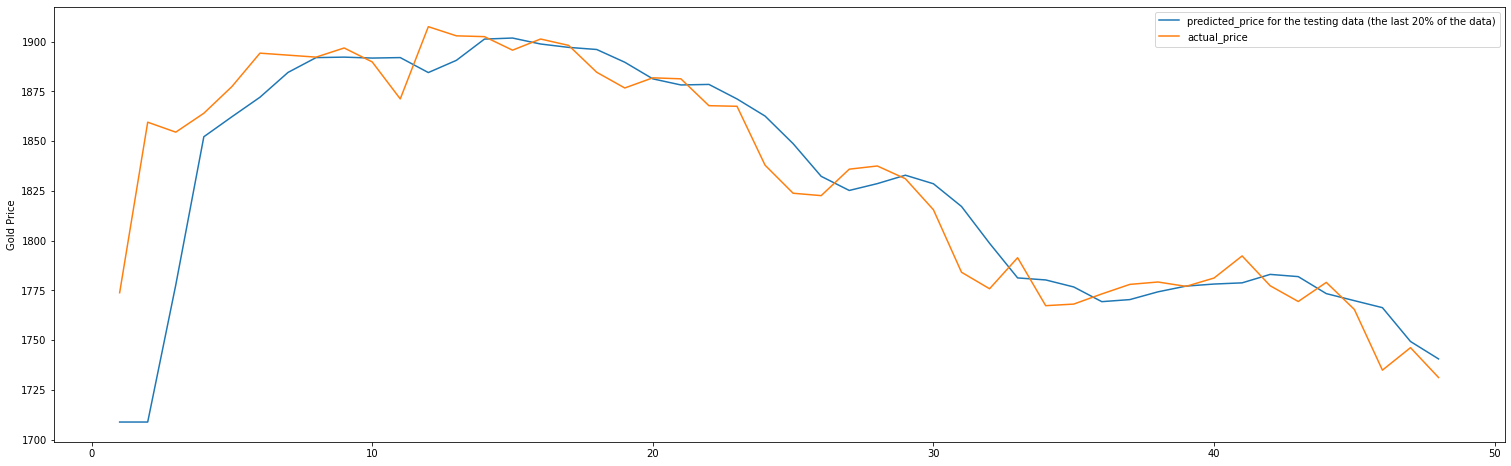

R square for regression 71.48
The Mean Absolute Percentage Error for the forecast of time period from 2019-07-11 to 2021-07-17 is 0.86%


In [ ]:
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
predicted_price.plot(figsize=(26,8)) 
y_test.plot()  
plt.legend(['predicted_price for the testing data (the last 20% of the data)','actual_price'])  
plt.ylabel("Gold Price")  
plt.show()
# Calculate R square and rmse to check goodness of fit
r2_score = linear.score(X_test, y_test)*100
print("R square for regression", float("{0:.2f}".format(r2_score)))
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((y_test - predicted_price['price']) / y_test)) * 100
print('The Mean Absolute Percentage Error for the forecast of time period from 2019-07-11 to 2021-07-17 is {:.2f}%'.format(MAPE))

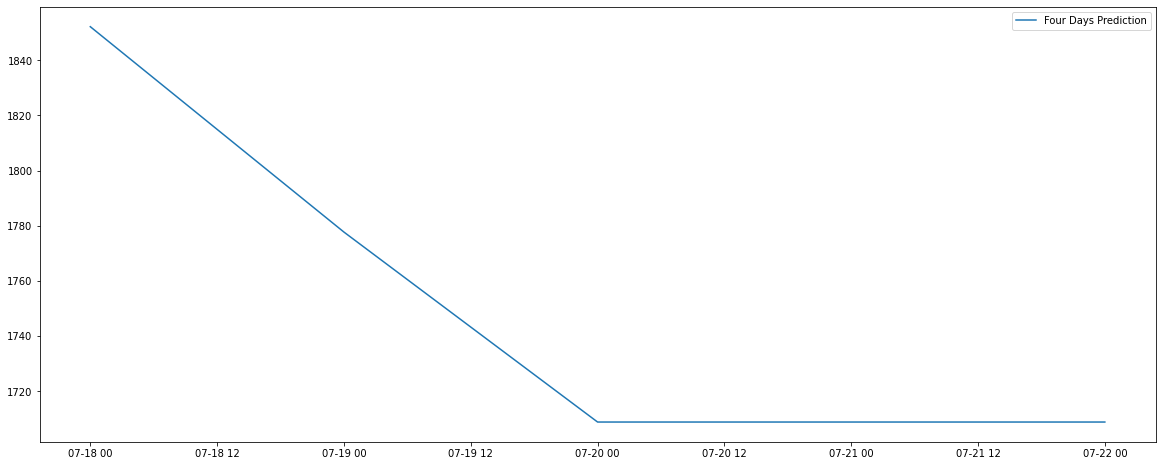

In [ ]:
# Predicted price of gold in the next 4 days
plt.rcParams['figure.figsize'] = [20,8]
x3 = pd.DataFrame({'Date': ['2021-07-18', '2021-07-19','2021-07-20','2021-07-22']})
y3 = predicted_price[-4:]
plt.plot(pd.to_datetime(x3['Date']), y3, label='Four Days Prediction')
plt.legend()
plt.show()

# SARIMA MODEL

In [ ]:
# Create the p, d, q parameter for ARAM model
import itertools
#Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 5)
SARIMAX: (0, 0, 1) x (0, 1, 0, 5)
SARIMAX: (0, 1, 0) x (0, 1, 1, 5)
SARIMAX: (0, 1, 0) x (1, 0, 0, 5)


In [ ]:
# Create train and test data
import numpy
train_data = DF_1[:436] #train data around 90%
test_data = DF_1[436:484] #test data around 10%

In [ ]:
# Select the best fitting model by minimizing AIC (Akaike Information Criterion) and BIC (Bayes Information Criterion)
import warnings
warnings.filterwarnings("ignore") 
import statsmodels.api as sm
AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 5) - AIC:7728.778702042935
SARIMAX(0, 0, 0)x(0, 0, 1, 5) - AIC:7068.623497539044
SARIMAX(0, 0, 0)x(0, 1, 0, 5) - AIC:4487.709643962228
SARIMAX(0, 0, 0)x(0, 1, 1, 5) - AIC:4412.894509641896
SARIMAX(0, 0, 0)x(1, 0, 0, 5) - AIC:4502.435894949227
SARIMAX(0, 0, 0)x(1, 0, 1, 5) - AIC:4456.428692020274
SARIMAX(0, 0, 0)x(1, 1, 0, 5) - AIC:4414.557620871286
SARIMAX(0, 0, 0)x(1, 1, 1, 5) - AIC:4401.444071413213
SARIMAX(0, 0, 0)x(2, 0, 0, 5) - AIC:4408.410570597464
SARIMAX(0, 0, 0)x(2, 0, 1, 5) - AIC:4407.089567340528
SARIMAX(0, 0, 0)x(2, 1, 0, 5) - AIC:4361.926715677642
SARIMAX(0, 0, 0)x(2, 1, 1, 5) - AIC:4363.253639603838
SARIMAX(0, 0, 0)x(3, 0, 0, 5) - AIC:4356.5653337899885
SARIMAX(0, 0, 0)x(3, 0, 1, 5) - AIC:4357.960073794083
SARIMAX(0, 0, 0)x(3, 1, 0, 5) - AIC:4314.822665017438
SARIMAX(0, 0, 0)x(3, 1, 1, 5) - AIC:4310.512332260885
SARIMAX(0, 0, 1)x(0, 0, 0, 5) - AIC:7124.334802261947
SARIMAX(0, 0, 1)x(0, 0, 1, 5) - AIC:6565.455344635478
SARIMAX(0, 0, 1)x(0, 1, 0, 

In [ ]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 3699.705106952095 for model SARIMAX(3, 1, 1)x(3, 1, 1, 5)


In [ ]:
# Fit this model
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

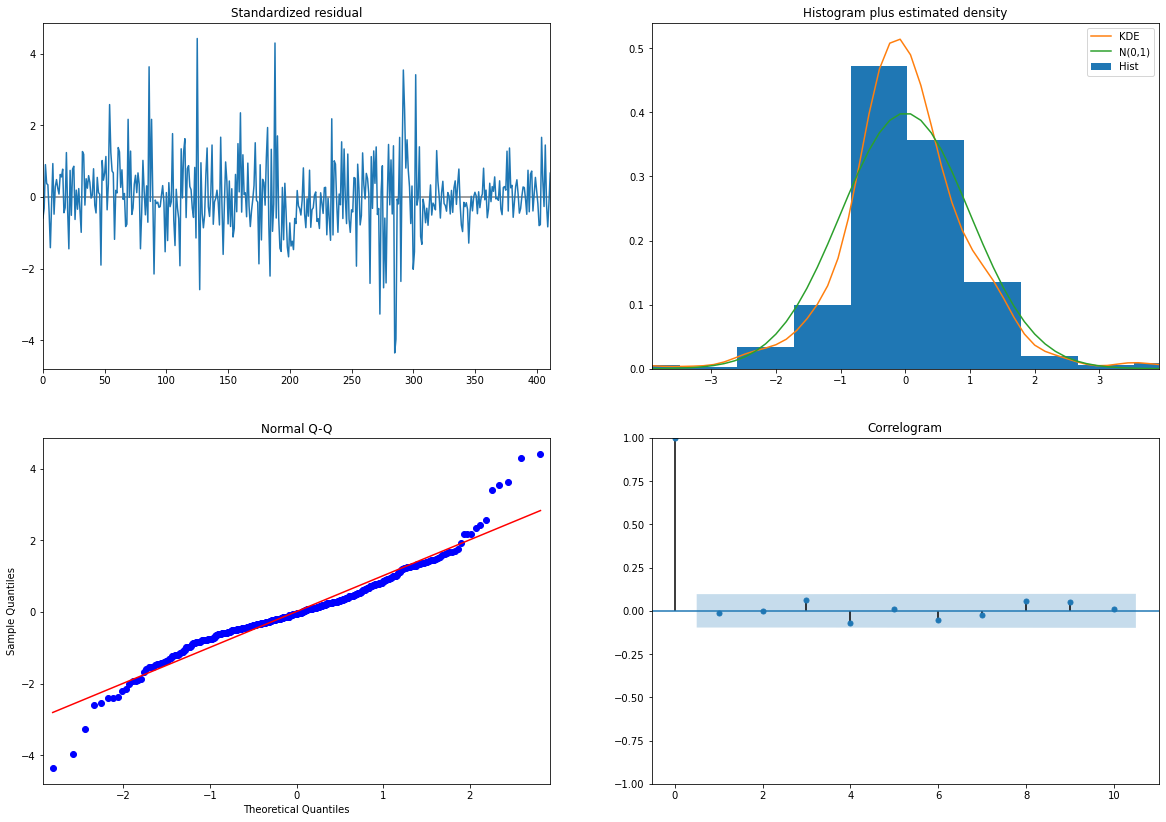

In [ ]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()

# Predicting the Price for Next 4 Days

In [ ]:
#predicted data with the same perid of test data
pred0 = results.get_forecast(steps=48)
pred0_ci = pred0.conf_int()

In [ ]:
#predicted data 4 days out of sample
pred1 = results.get_forecast(steps=53)
pred1_ci = pred1.conf_int()
pred1.predicted_mean[-4:]

485    1462.997207
486    1462.816232
487    1462.127355
488    1462.217696
dtype: float64

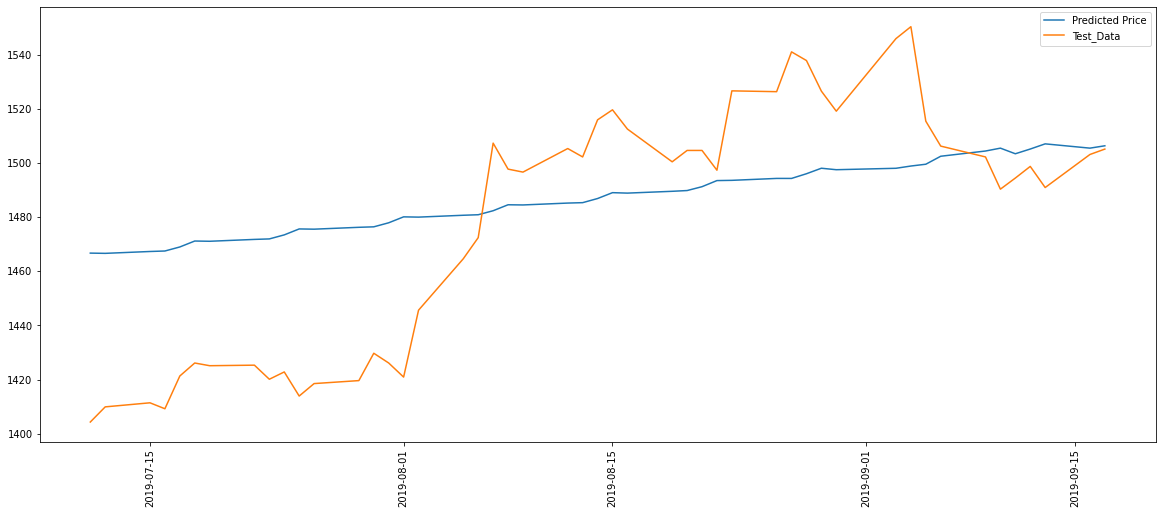

In [ ]:

# Test data vs. predicted data
%matplotlib inline
x = test_data.index
y = pred0.predicted_mean
y1 = test_data
x2 = DF_1[:436].index
y2 = DF_1[:436]
plt.rcParams['figure.figsize'] = [20,8]
plt.plot(x, y, label='Predicted Price')
plt.plot(x, y1, label='Test_Data')
#plt.plot(x2, y2, label='Train_data')
plt.legend()
plt.xticks(rotation=90)
plt.show()

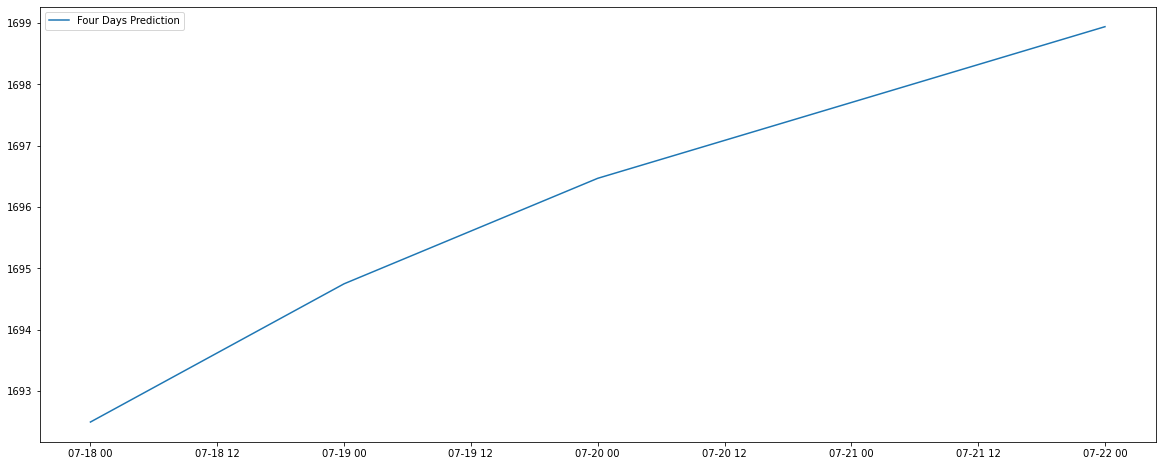

In [ ]:
# Predicted price of gold in the next 4 days
plt.rcParams['figure.figsize'] = [20,8]
x3 = pd.DataFrame({'Date': ['2021-07-18', '2021-07-19','2021-07-20','2021-07-22']})
y3 = pred1_ci.iloc[-4:,1:2]
plt.plot(pd.to_datetime(x3['Date']), y3, label='Four Days Prediction')
plt.legend()
plt.show()

In [ ]:
#evaluation
prediction =pred0.predicted_mean[:49].values
# flatten nested list
truth = (test_data.values)
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((truth - prediction) / truth)) * 100
print('The Mean Absolute Percentage Error for the forecast of time period from2011-10-14 to 2019-11-12 is {:.2f}%'.format(MAPE))

The Mean Absolute Percentage Error for the forecast of time period from2011-10-14 to 2019-11-12 is 2.14%
